In [1]:
#First solution for groundwater flow equation using discretization

#When working with files, it is always a good idea to import os, which allows you to be computer-agnostic
import os
#To create basic animations (by repeatedly changing a figure), these internal subroutines of iPython must be imported
from IPython.display import clear_output, display

#Any type of plot that involves matrices will end up needing NumPy
import numpy as np
#Import the plotting libraries of Matplotlib (the most commonly used routines)
import matplotlib.pyplot as plt
#This method will import everything associated with SciPy, but to use it, you must work within submodules
import scipy as scipy
#This method will allow you more direct access to the linear algebra routines of SciPy
from scipy import linalg as LA


[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.67361738e-19]
 [-4.33680869e-19]
 [-4.33680869e-19]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.33680869e-19]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.16840434e-19]
 [ 1.10182046e-17]]
[[10.        ]
 [ 9.99285714]
 [ 9.98571429]
 [ 9.97857143]
 [ 9.97142857]
 [ 9.96428571]
 [ 9.95714286]
 [ 9.95      ]
 [ 9.94285714]
 [ 9.93571429]
 [ 9.92857143]
 [ 9.92142857]
 [ 9.91428571]
 [ 9.90714286]
 [ 9.9       ]]
[   0.           71.42857143  142.85714286  214.28571429  285.71428571
  357.14285714  428.57142857  500.          571.42857143  642.85714286
  714.28571429  785.71428571  857.14285714  928.57142857 1000.        ]


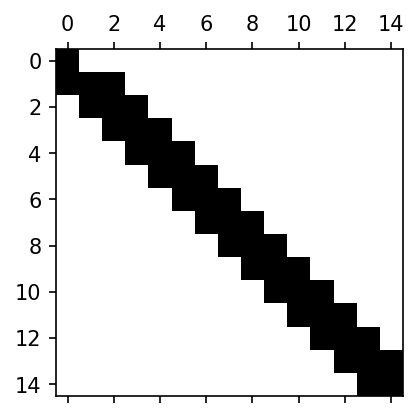

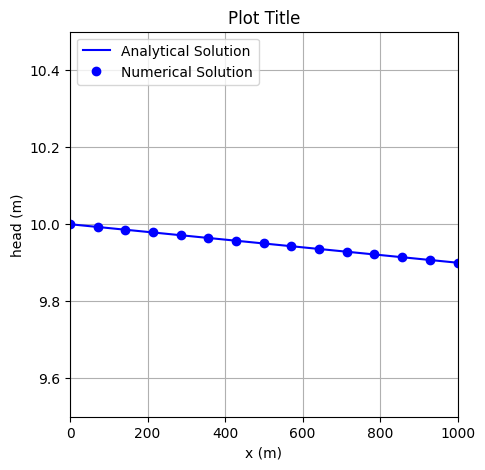

In [2]:
n = 15
A = np.zeros((n,n))
b = np.zeros((n,1))

hL = 10 # units are m
qR = 0.001 #units are m/day
K = 10 #units ar m/day
L = 1000 #units are m
dx = L/(n-1)
#x = np.arange(0,L+0.001,dx)
x = np.linspace(0,L,n)

il  = range(n)
for i in il:
  if i == 0:
    A[i,i] = 1
    b[i] = hL
  elif i == (n-1):
    A[i,i] = 1/dx
    A[i,i-1] = -1/dx
    b[i] = -qR/K
  else:
    A[i,i-1] = 1/(dx**2)
    A[i,i] = -2/(dx**2)
    A[i,i+1] = 1/(dx**2)
    b[i] = 0

#When creating a matrix by-hand, it is often good to be able to inspect it for errors.
fig = plt.figure(figsize=(3,3),dpi=150)
#You may use this to show all non-zero entries
plt.spy(A)

h = LA.solve(A,b)
Ah = A@h
resid = Ah - b
print(resid)

print(h)
print(x)

#1-D solution, plug in values for other spatial variables
h1D_soln_analyt = -1E-4*x + 10
h1Dmax_soln = np.max(h1D_soln_analyt)

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
#Produce two visualizations: 
#0: Cross-section with water table (1-D), and 
axes.plot(x, h1D_soln_analyt, "b",label="Analytical Solution")
axes.plot(x, h, "ob",label="Numerical Solution")

#If more solutions should be plotted, use this format
#axes[0].plot(x, h1D_soln2, "b",label="Water Table Unconfined",alpha=0.3)
axes.set_xlabel("x (m)")
axes.set_ylabel("head (m)")
axes.set_title("Plot Title")
axes.legend(loc='upper left')
axes.set_ybound(9.5,h1Dmax_soln+.5)
axes.set_xbound(0,L)
axes.grid(visible=True)

